**Libraries**
-

In [43]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# importar funciones del torneo
from tournament import run_tournament, play_game, column_usage, drop_piece, check_win,tournament_metrics_fast
from MyPolicy import MyPolicy
from LastPolicy import MyLastPolicy
from RandomPolicy import RandomPolicy
from DeterministicPolicy import DeterministicPolicy

sns.set(style="whitegrid")


# **1. Agente Nuevo**

## **1.1 Correr el Algoritmo**

In [44]:
metrics_actual = tournament_metrics_fast(MyPolicy, RandomPolicy, games=100)

Tasa de Ganar A: 0.97


C:\Users\joela\AppData\Local\Temp\ipykernel_30108\2061913757.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Resultado", y="Cantidad", palette="Blues_d")


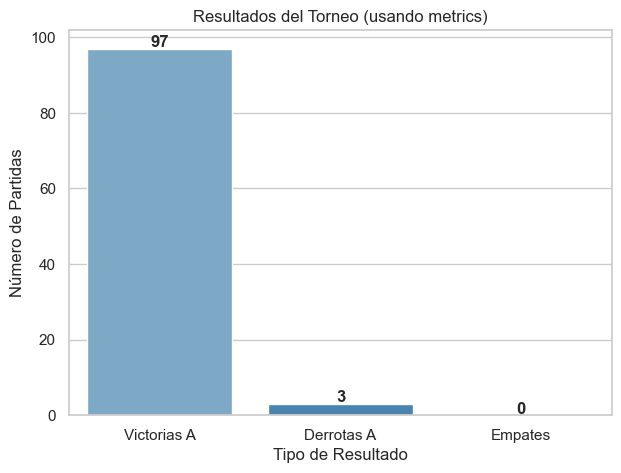

In [45]:
wins = metrics_actual["wins"]
losses = metrics_actual["losses"]
draws = metrics_actual["draws"]
games = wins + losses + draws

print("Tasa de Ganar A:", wins / games)

# Crear DataFrame para seaborn
df = pd.DataFrame({
    "Resultado": ["Victorias A", "Derrotas A", "Empates"],
    "Cantidad": [wins, losses, draws]
})

# --- Gráfico ---
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

ax = sns.barplot(data=df, x="Resultado", y="Cantidad", palette="Blues_d")

plt.title("Resultados del Torneo (usando metrics)")
plt.ylabel("Número de Partidas")
plt.xlabel("Tipo de Resultado")

# Etiquetas arriba de las barras
for i, v in enumerate(df["Cantidad"]):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()


## **1.2 Barplot Rendimiento**

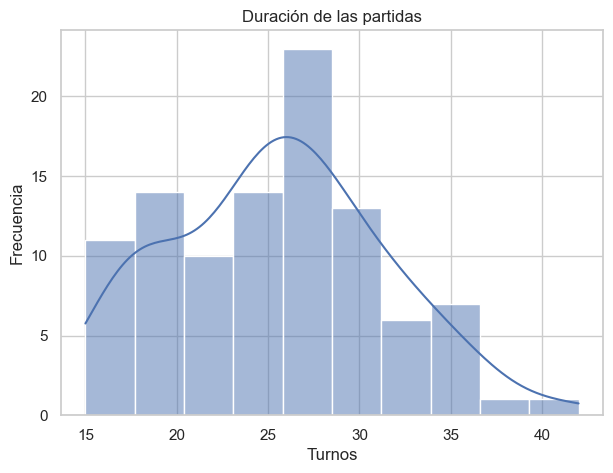

In [46]:
lengths = metrics_actual["lengths"]
lengths

plt.figure(figsize=(7,5))
sns.histplot(lengths, bins=10, kde=True)
plt.title("Duración de las partidas")
plt.xlabel("Turnos")
plt.ylabel("Frecuencia")
plt.show()


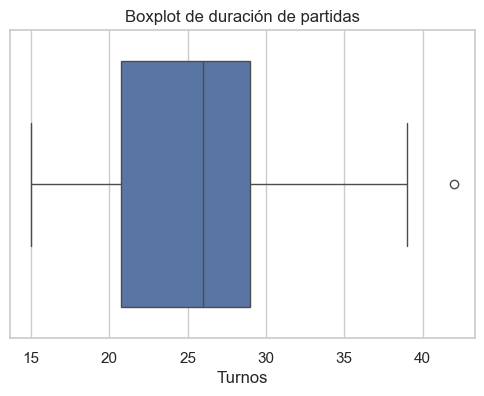

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(x=metrics_actual["lengths"])
plt.title("Boxplot de duración de partidas")
plt.xlabel("Turnos")
plt.show()


## **1.3 Clasificación de Partidas por Velocidad**

C:\Users\joela\AppData\Local\Temp\ipykernel_30108\1783033714.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_types, x="Tipo", y="Cantidad", palette="Blues_d")


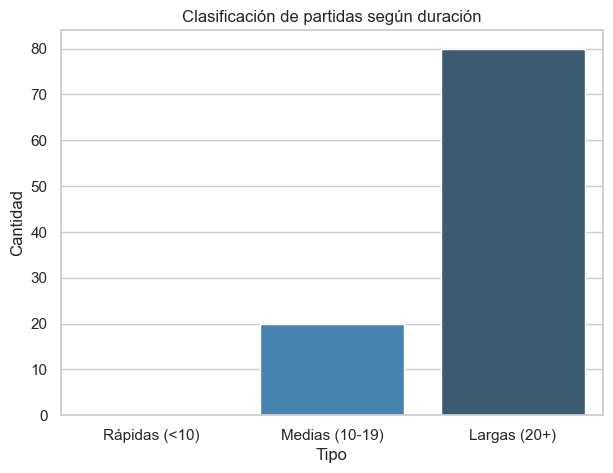

In [48]:
df_types = pd.DataFrame({
    "Tipo": ["Rápidas (<10)", "Medias (10-19)", "Largas (20+)"],
    "Cantidad": [
        metrics_actual["fast_games"],
        metrics_actual["mid_games"],
        metrics_actual["late_games"]
    ]
})

plt.figure(figsize=(7,5))
sns.barplot(data=df_types, x="Tipo", y="Cantidad", palette="Blues_d")
plt.title("Clasificación de partidas según duración")
plt.show()


## **1.4 Resultados de Partidas**

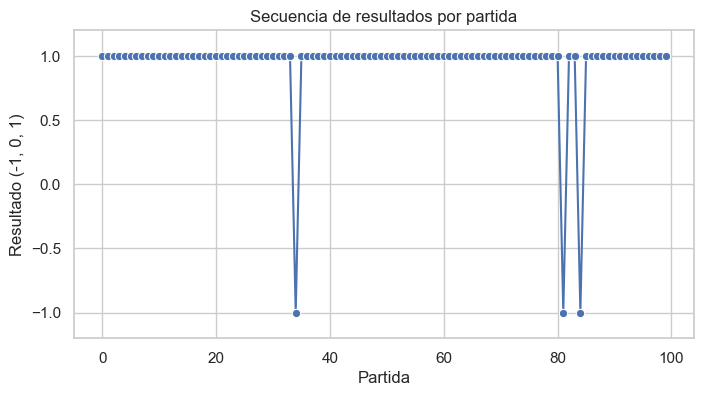

In [49]:
seq = metrics_actual["sequence"]

plt.figure(figsize=(8,4))
sns.lineplot(x=range(len(seq)), y=seq, marker="o")
plt.title("Secuencia de resultados por partida")
plt.xlabel("Partida")
plt.ylabel("Resultado (-1, 0, 1)")
plt.ylim(-1.2,1.2)
plt.show()


## **1.5 Distribución de Partidas Según su Resultado**

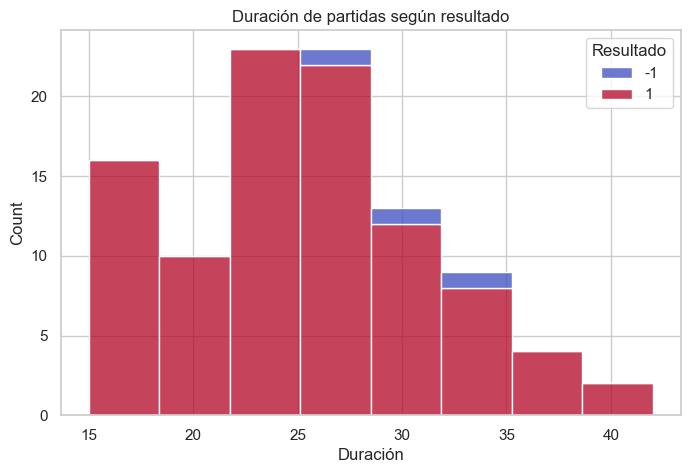

In [50]:
lengths = metrics_actual["lengths"]
seq = metrics_actual["sequence"]

df_lr = pd.DataFrame({
    "Duración": lengths,
    "Resultado": seq
})

plt.figure(figsize=(8,5))
sns.histplot(data=df_lr, x="Duración", hue="Resultado", multiple="stack", palette="coolwarm")
plt.title("Duración de partidas según resultado")
plt.show()


## **1.6 Métricas Finales**

In [51]:
import numpy as np

seq = np.array(metrics_actual["sequence"])
lens = np.array(metrics_actual["lengths"])

print("\n================  MÉTRICAS AVANZADAS DEL AGENTE MCTS  ================\n")

# -------------------------------------------------------------------------
# 1. RESULTADOS BÁSICOS
# -------------------------------------------------------------------------
print("Victorias:", metrics_actual["wins"])
print("Derrotas:", metrics_actual["losses"])
print("Empates:", metrics_actual["draws"])

# -------------------------------------------------------------------------
# 2. MÉTRICAS DE DURACIÓN
# -------------------------------------------------------------------------
print("\nDuración promedio:", metrics_actual["avg_length"])
print("Duración mínima:", np.min(lens))
print("Duración máxima:", np.max(lens))
print("Rango de duración:", np.max(lens) - np.min(lens))
print("Desviación estándar de duración:", np.std(lens))
print("Varianza de duración:", np.var(lens))

# Percentiles
print("P10 de duración:", np.percentile(lens, 10))
print("P25 de duración:", np.percentile(lens, 25))
print("P50 (mediana) de duración:", np.percentile(lens, 50))
print("P75 de duración:", np.percentile(lens, 75))
print("P90 de duración:", np.percentile(lens, 90))

# -------------------------------------------------------------------------
# 3. CLASIFICACIÓN DE PARTIDAS
# -------------------------------------------------------------------------
total = len(lens)
print("\nRápidas (<10):", metrics_actual["fast_games"], f"({metrics_actual['fast_games']/total:.2%})")
print("Medias (10-19):", metrics_actual["mid_games"], f"({metrics_actual['mid_games']/total:.2%})")
print("Largas (20+):", metrics_actual["late_games"], f"({metrics_actual['late_games']/total:.2%})")

# -------------------------------------------------------------------------
# 4. MÉTRICAS SOBRE LA SECUENCIA DE RESULTADOS
# -------------------------------------------------------------------------
print("\nPromedio de resultados:", np.mean(seq))
print("Varianza de resultados:", np.var(seq))
print("Desviación estándar de resultados:", np.std(seq))
print("Número de cambios bruscos (Δ >= 1):", np.sum(np.abs(np.diff(seq)) >= 1))
print("Promedio de magnitud de resultado (0 empate,1 decisivo):", np.mean(np.abs(seq)))

# -------------------------------------------------------------------------
# 5. MÉTRICAS YA COMPUTADAS
# -------------------------------------------------------------------------
print("\nDominance score:", metrics_actual["dominance"])
print("Stability score:", metrics_actual["stability"])
print("Momentum score:", metrics_actual["momentum"])

# -------------------------------------------------------------------------
# 6. CONSISTENCIA
# -------------------------------------------------------------------------
def get_streaks(sequence, target):
    streaks = []
    current = 0

    for x in sequence:
        if x == target:
            current += 1
        else:
            if current > 0:
                streaks.append(current)
            current = 0

    if current > 0:
        streaks.append(current)

    return streaks
seq = metrics_actual["sequence"]

win_streaks = get_streaks(seq, 1)
loss_streaks = get_streaks(seq, -1)
draw_streaks = get_streaks(seq, 0)

print("Rachas de victorias:", win_streaks)
print("Rachas de derrotas:", loss_streaks)
print("Rachas de empates:", draw_streaks)

print("\n====== MÉTRICAS DE RACHAS ======")

print("Mayor racha de victorias:", max(win_streaks) if win_streaks else 0)
print("Mayor racha de derrotas:", max(loss_streaks) if loss_streaks else 0)
print("Mayor racha de empates:", max(draw_streaks) if draw_streaks else 0)

print("Promedio de rachas de victorias:", np.mean(win_streaks) if win_streaks else 0)
print("Promedio de rachas de derrotas:", np.mean(loss_streaks) if loss_streaks else 0)

print("Cantidad de rachas de victoria:", len(win_streaks))
print("Cantidad de rachas de derrota:", len(loss_streaks))

print("Proporción de rachas largas (>2):", 
      np.sum(np.array(win_streaks) > 2) / len(win_streaks) if win_streaks else 0)

# -------------------------------------------------------------------------
# 7. CORRELACIÓN ENTRE DURACIÓN Y RESULTADO
# -------------------------------------------------------------------------
if len(seq) > 1:
    correlation = np.corrcoef(lens, seq)[0,1]
    print("\nCorrelación duración–resultado:", correlation)

print("\n=======================  FIN DE LAS MÉTRICAS  ========================")



================  MÉTRICAS AVANZADAS DEL AGENTE MCTS  ================

Victorias: 97
Derrotas: 3
Empates: 0

Duración promedio: 25.51
Duración mínima: 15
Duración máxima: 42
Rango de duración: 27
Desviación estándar de duración: 5.865995226728368
Varianza de duración: 34.4099
P10 de duración: 17.0
P25 de duración: 20.75
P50 (mediana) de duración: 26.0
P75 de duración: 29.0
P90 de duración: 33.0

Rápidas (<10): 0 (0.00%)
Medias (10-19): 20 (20.00%)
Largas (20+): 80 (80.00%)

Promedio de resultados: 0.94
Varianza de resultados: 0.11640000000000002
Desviación estándar de resultados: 0.34117444218463966
Número de cambios bruscos (Δ >= 1): 6
Promedio de magnitud de resultado (0 empate,1 decisivo): 1.0

Dominance score: 0.94
Stability score: 0.11640000000000002
Momentum score: -0.039999999999999925
Rachas de victorias: [34, 46, 2, 15]
Rachas de derrotas: [1, 1, 1]
Rachas de empates: []

====== MÉTRICAS DE RACHAS ======
Mayor racha de victorias: 46
Mayor racha de derrotas: 1
Mayor racha de 

# **2. Agente Previo**

## **2.1 Correr el Algoritmo**

In [52]:
metrics = tournament_metrics_fast(MyPolicy, RandomPolicy, games=100)

Tasa de Ganar A: 0.93


C:\Users\joela\AppData\Local\Temp\ipykernel_30108\1911351898.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Resultado", y="Cantidad", palette="Blues_d")


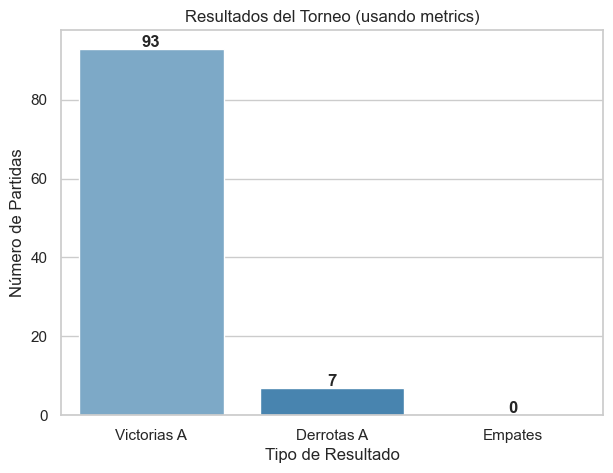

In [53]:
wins = metrics["wins"]
losses = metrics["losses"]
draws = metrics["draws"]
games = wins + losses + draws

print("Tasa de Ganar A:", wins / games)

# Crear DataFrame para seaborn
df = pd.DataFrame({
    "Resultado": ["Victorias A", "Derrotas A", "Empates"],
    "Cantidad": [wins, losses, draws]
})

# --- Gráfico ---
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

ax = sns.barplot(data=df, x="Resultado", y="Cantidad", palette="Blues_d")

plt.title("Resultados del Torneo (usando metrics)")
plt.ylabel("Número de Partidas")
plt.xlabel("Tipo de Resultado")

# Etiquetas arriba de las barras
for i, v in enumerate(df["Cantidad"]):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()


## **2.2 Distribución de la Duración de las Partidas**

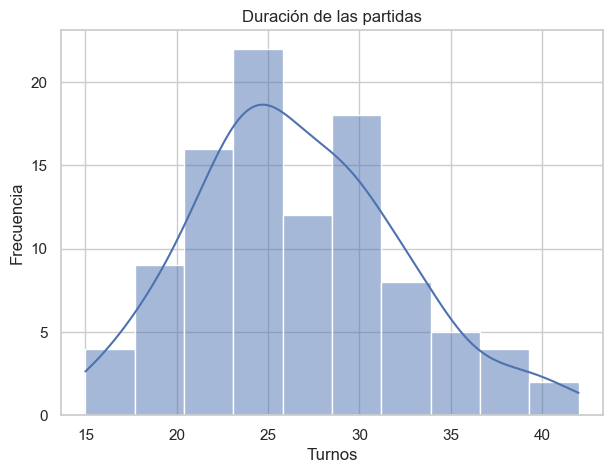

In [54]:
lengths = metrics["lengths"]
lengths

plt.figure(figsize=(7,5))
sns.histplot(lengths, bins=10, kde=True)
plt.title("Duración de las partidas")
plt.xlabel("Turnos")
plt.ylabel("Frecuencia")
plt.show()



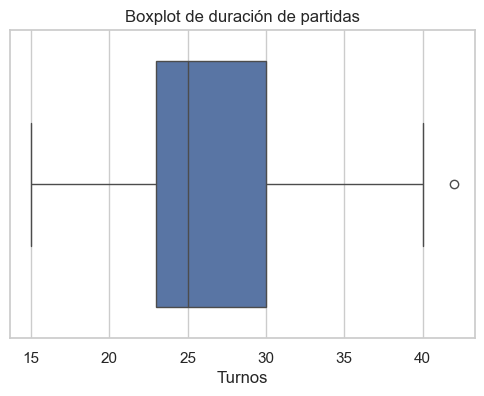

In [55]:
plt.figure(figsize=(6,4))
sns.boxplot(x=metrics["lengths"])
plt.title("Boxplot de duración de partidas")
plt.xlabel("Turnos")
plt.show()


## **2.3 Clasificación de Partidas por Velocidad**

C:\Users\joela\AppData\Local\Temp\ipykernel_30108\3944781062.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_types, x="Tipo", y="Cantidad", palette="Blues_d")


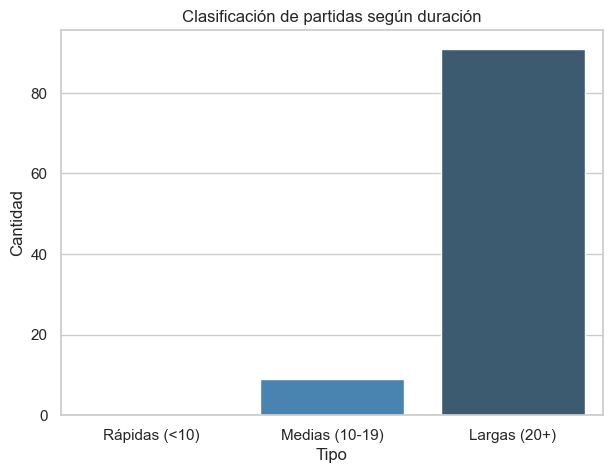

In [56]:
df_types = pd.DataFrame({
    "Tipo": ["Rápidas (<10)", "Medias (10-19)", "Largas (20+)"],
    "Cantidad": [
        metrics["fast_games"],
        metrics["mid_games"],
        metrics["late_games"]
    ]
})

plt.figure(figsize=(7,5))
sns.barplot(data=df_types, x="Tipo", y="Cantidad", palette="Blues_d")
plt.title("Clasificación de partidas según duración")
plt.show()


## **2.4 Resultados Partidas**

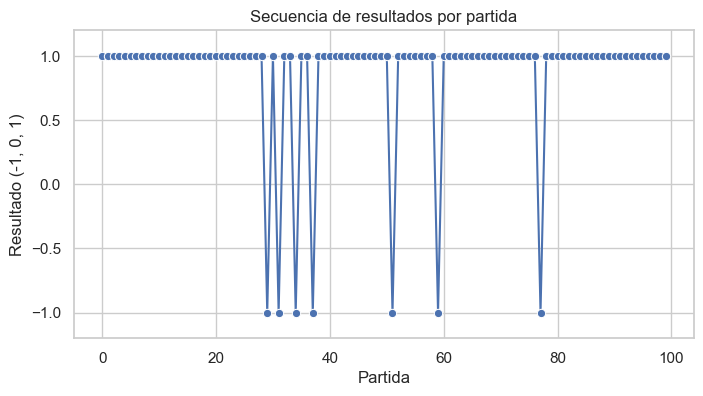

In [57]:
seq = metrics["sequence"]

plt.figure(figsize=(8,4))
sns.lineplot(x=range(len(seq)), y=seq, marker="o")
plt.title("Secuencia de resultados por partida")
plt.xlabel("Partida")
plt.ylabel("Resultado (-1, 0, 1)")
plt.ylim(-1.2,1.2)
plt.show()


## **2.5 Distribución de Partidas Según su Resultado**

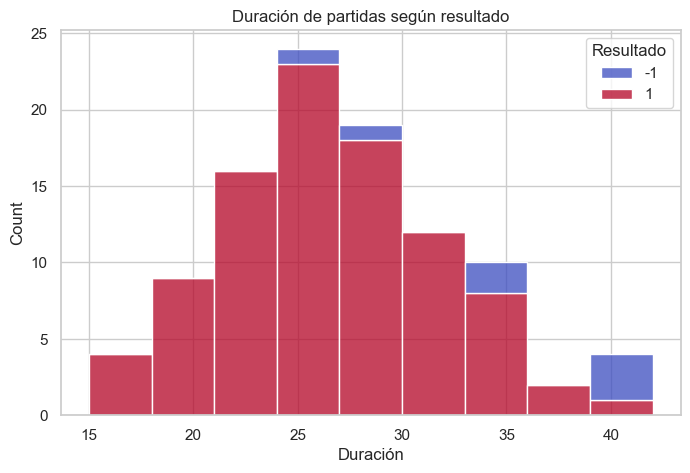

In [58]:
lengths = metrics["lengths"]
seq = metrics["sequence"]

df_lr = pd.DataFrame({
    "Duración": lengths,
    "Resultado": seq
})

plt.figure(figsize=(8,5))
sns.histplot(data=df_lr, x="Duración", hue="Resultado", multiple="stack", palette="coolwarm")
plt.title("Duración de partidas según resultado")
plt.show()


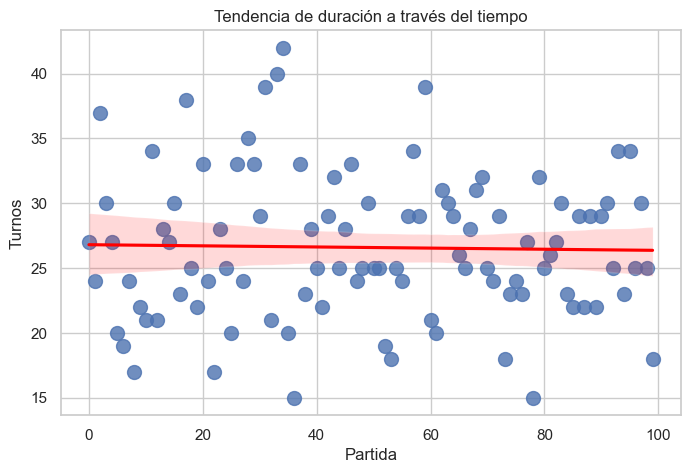

In [59]:
lens = metrics["lengths"]
x = np.arange(len(lens))

plt.figure(figsize=(8,5))
sns.regplot(x=x, y=lens, scatter_kws={"s": 100}, line_kws={"color": "red"})
plt.title("Tendencia de duración a través del tiempo")
plt.xlabel("Partida")
plt.ylabel("Turnos")
plt.show()


In [60]:
import numpy as np

seq = np.array(metrics["sequence"])
lens = np.array(metrics["lengths"])

print("\n================  MÉTRICAS AVANZADAS DEL AGENTE MCTS  ================\n")

# -------------------------------------------------------------------------
# 1. RESULTADOS BÁSICOS
# -------------------------------------------------------------------------
print("Victorias:", metrics["wins"])
print("Derrotas:", metrics["losses"])
print("Empates:", metrics["draws"])

# -------------------------------------------------------------------------
# 2. MÉTRICAS DE DURACIÓN
# -------------------------------------------------------------------------
print("\nDuración promedio:", metrics["avg_length"])
print("Duración mínima:", np.min(lens))
print("Duración máxima:", np.max(lens))
print("Rango de duración:", np.max(lens) - np.min(lens))
print("Desviación estándar de duración:", np.std(lens))
print("Varianza de duración:", np.var(lens))

# Percentiles
print("P10 de duración:", np.percentile(lens, 10))
print("P25 de duración:", np.percentile(lens, 25))
print("P50 (mediana) de duración:", np.percentile(lens, 50))
print("P75 de duración:", np.percentile(lens, 75))
print("P90 de duración:", np.percentile(lens, 90))

# -------------------------------------------------------------------------
# 3. CLASIFICACIÓN DE PARTIDAS
# -------------------------------------------------------------------------
total = len(lens)
print("\nRápidas (<10):", metrics["fast_games"], f"({metrics['fast_games']/total:.2%})")
print("Medias (10-19):", metrics["mid_games"], f"({metrics['mid_games']/total:.2%})")
print("Largas (20+):", metrics["late_games"], f"({metrics['late_games']/total:.2%})")

# -------------------------------------------------------------------------
# 4. MÉTRICAS SOBRE LA SECUENCIA DE RESULTADOS
# -------------------------------------------------------------------------
print("\nPromedio de resultados:", np.mean(seq))
print("Varianza de resultados:", np.var(seq))
print("Desviación estándar de resultados:", np.std(seq))
print("Número de cambios bruscos (Δ >= 1):", np.sum(np.abs(np.diff(seq)) >= 1))
print("Promedio de magnitud de resultado (0 empate,1 decisivo):", np.mean(np.abs(seq)))

# -------------------------------------------------------------------------
# 5. MÉTRICAS YA COMPUTADAS
# -------------------------------------------------------------------------
print("\nDominance score:", metrics["dominance"])
print("Stability score:", metrics["stability"])
print("Momentum score:", metrics["momentum"])

# -------------------------------------------------------------------------
# 6. CONSISTENCIA
# -------------------------------------------------------------------------
def get_streaks(sequence, target):
    streaks = []
    current = 0

    for x in sequence:
        if x == target:
            current += 1
        else:
            if current > 0:
                streaks.append(current)
            current = 0

    if current > 0:
        streaks.append(current)

    return streaks
seq = metrics["sequence"]

win_streaks = get_streaks(seq, 1)
loss_streaks = get_streaks(seq, -1)
draw_streaks = get_streaks(seq, 0)

print("Rachas de victorias:", win_streaks)
print("Rachas de derrotas:", loss_streaks)
print("Rachas de empates:", draw_streaks)

print("\n====== MÉTRICAS DE RACHAS ======")

print("Mayor racha de victorias:", max(win_streaks) if win_streaks else 0)
print("Mayor racha de derrotas:", max(loss_streaks) if loss_streaks else 0)
print("Mayor racha de empates:", max(draw_streaks) if draw_streaks else 0)

print("Promedio de rachas de victorias:", np.mean(win_streaks) if win_streaks else 0)
print("Promedio de rachas de derrotas:", np.mean(loss_streaks) if loss_streaks else 0)

print("Cantidad de rachas de victoria:", len(win_streaks))
print("Cantidad de rachas de derrota:", len(loss_streaks))

print("Proporción de rachas largas (>2):", 
      np.sum(np.array(win_streaks) > 2) / len(win_streaks) if win_streaks else 0)

# -------------------------------------------------------------------------
# 7. CORRELACIÓN ENTRE DURACIÓN Y RESULTADO
# -------------------------------------------------------------------------
if len(seq) > 1:
    correlation = np.corrcoef(lens, seq)[0,1]
    print("\nCorrelación duración–resultado:", correlation)

print("\n=======================  FIN DE LAS MÉTRICAS  ========================")



================  MÉTRICAS AVANZADAS DEL AGENTE MCTS  ================

Victorias: 93
Derrotas: 7
Empates: 0

Duración promedio: 26.59
Duración mínima: 15
Duración máxima: 42
Rango de duración: 27
Desviación estándar de duración: 5.578700565543915
Varianza de duración: 31.1219
P10 de duración: 20.0
P25 de duración: 23.0
P50 (mediana) de duración: 25.0
P75 de duración: 30.0
P90 de duración: 34.0

Rápidas (<10): 0 (0.00%)
Medias (10-19): 9 (9.00%)
Largas (20+): 91 (91.00%)

Promedio de resultados: 0.86
Varianza de resultados: 0.26039999999999996
Desviación estándar de resultados: 0.5102940328869229
Número de cambios bruscos (Δ >= 1): 14
Promedio de magnitud de resultado (0 empate,1 decisivo): 1.0

Dominance score: 0.86
Stability score: 0.26039999999999996
Momentum score: 0.040000000000000036
Rachas de victorias: [29, 1, 2, 2, 13, 7, 17, 22]
Rachas de derrotas: [1, 1, 1, 1, 1, 1, 1]
Rachas de empates: []

====== MÉTRICAS DE RACHAS ======
Mayor racha de victorias: 29
Mayor racha de derrot

# **3. Agente Viejo Contra Agente Determinista**

## **3.1 Correr Algoritmo**

In [61]:
metrics_deterministic = tournament_metrics_fast(MyPolicy, DeterministicPolicy, games=100)

Tasa de Ganar A: 0.02


C:\Users\joela\AppData\Local\Temp\ipykernel_30108\2510680563.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x="Resultado", y="Cantidad", palette="Blues_d")


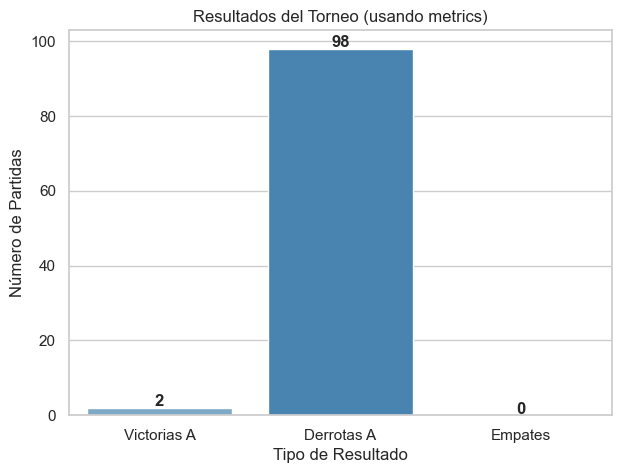

In [62]:
wins = metrics_deterministic["wins"]
losses = metrics_deterministic["losses"]
draws = metrics_deterministic["draws"]
games = wins + losses + draws

print("Tasa de Ganar A:", wins / games)

# Crear DataFrame para seaborn
df = pd.DataFrame({
    "Resultado": ["Victorias A", "Derrotas A", "Empates"],
    "Cantidad": [wins, losses, draws]
})

# --- Gráfico ---
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))

ax = sns.barplot(data=df, x="Resultado", y="Cantidad", palette="Blues_d")

plt.title("Resultados del Torneo (usando metrics)")
plt.ylabel("Número de Partidas")
plt.xlabel("Tipo de Resultado")

# Etiquetas arriba de las barras
for i, v in enumerate(df["Cantidad"]):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()


## **3.2 Duración de las Partidas**

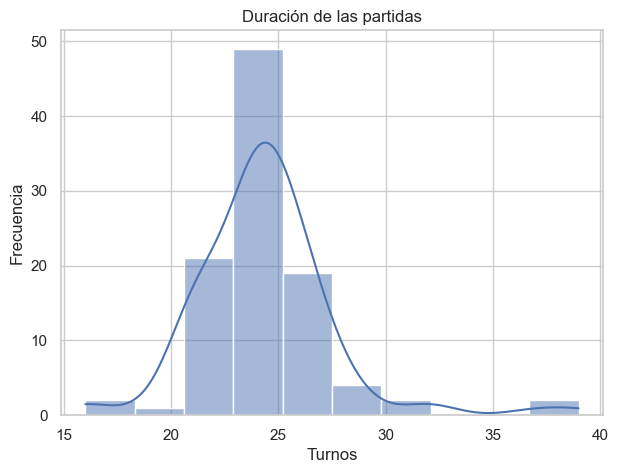

In [63]:
lengths = metrics_deterministic["lengths"]
lengths

plt.figure(figsize=(7,5))
sns.histplot(lengths, bins=10, kde=True)
plt.title("Duración de las partidas")
plt.xlabel("Turnos")
plt.ylabel("Frecuencia")
plt.show()



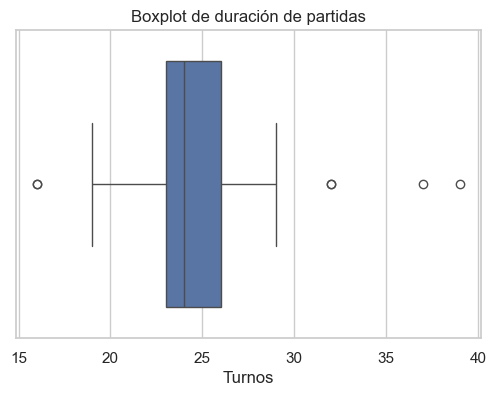

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(x=metrics_deterministic["lengths"])
plt.title("Boxplot de duración de partidas")
plt.xlabel("Turnos")
plt.show()


## **3.3 Clasificación de Partidas por Velocidad**

C:\Users\joela\AppData\Local\Temp\ipykernel_30108\1187249253.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_types, x="Tipo", y="Cantidad", palette="Blues_d")


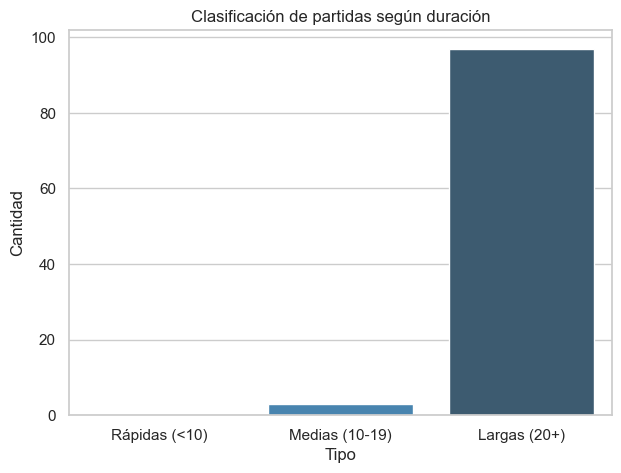

In [65]:
df_types = pd.DataFrame({
    "Tipo": ["Rápidas (<10)", "Medias (10-19)", "Largas (20+)"],
    "Cantidad": [
        metrics_deterministic["fast_games"],
        metrics_deterministic["mid_games"],
        metrics_deterministic["late_games"]
    ]
})

plt.figure(figsize=(7,5))
sns.barplot(data=df_types, x="Tipo", y="Cantidad", palette="Blues_d")
plt.title("Clasificación de partidas según duración")
plt.show()


## **3.4 Resultado de Partida**

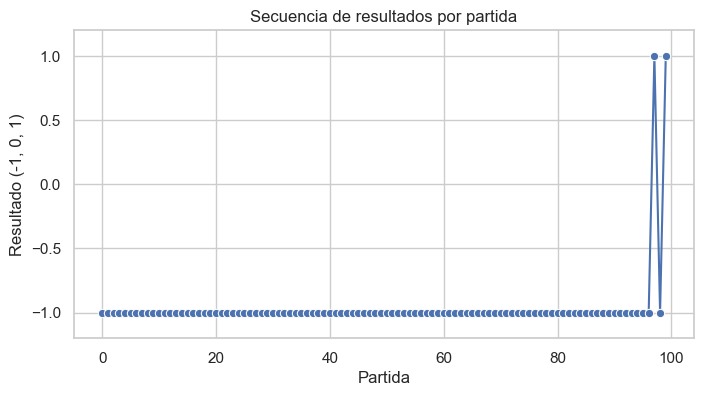

In [66]:
seq = metrics_deterministic["sequence"]

plt.figure(figsize=(8,4))
sns.lineplot(x=range(len(seq)), y=seq, marker="o")
plt.title("Secuencia de resultados por partida")
plt.xlabel("Partida")
plt.ylabel("Resultado (-1, 0, 1)")
plt.ylim(-1.2,1.2)
plt.show()


## **3.5 Distribución de Partidas por Duración y Resultado**

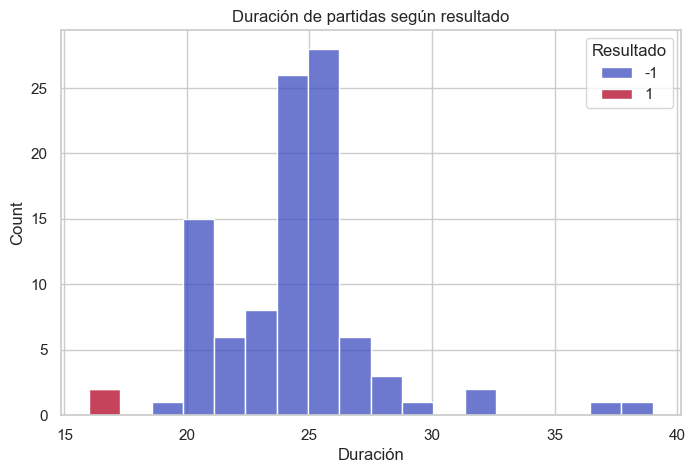

In [67]:
lengths = metrics_deterministic["lengths"]
seq = metrics_deterministic["sequence"]

df_lr = pd.DataFrame({
    "Duración": lengths,
    "Resultado": seq
})

plt.figure(figsize=(8,5))
sns.histplot(data=df_lr, x="Duración", hue="Resultado", multiple="stack", palette="coolwarm")
plt.title("Duración de partidas según resultado")
plt.show()


## **3.6 Métricas Finales**

In [68]:
import numpy as np

seq = np.array(metrics_deterministic["sequence"])
lens = np.array(metrics_deterministic["lengths"])

print("\n================  MÉTRICAS AVANZADAS DEL AGENTE MCTS  ================\n")

# -------------------------------------------------------------------------
# 1. RESULTADOS BÁSICOS
# -------------------------------------------------------------------------
print("Victorias:", metrics_deterministic["wins"])
print("Derrotas:", metrics_deterministic["losses"])
print("Empates:", metrics_deterministic["draws"])

# -------------------------------------------------------------------------
# 2. MÉTRICAS DE DURACIÓN
# -------------------------------------------------------------------------
print("\nDuración promedio:", metrics_deterministic["avg_length"])
print("Duración mínima:", np.min(lens))
print("Duración máxima:", np.max(lens))
print("Rango de duración:", np.max(lens) - np.min(lens))
print("Desviación estándar de duración:", np.std(lens))
print("Varianza de duración:", np.var(lens))

# Percentiles
print("P10 de duración:", np.percentile(lens, 10))
print("P25 de duración:", np.percentile(lens, 25))
print("P50 (mediana) de duración:", np.percentile(lens, 50))
print("P75 de duración:", np.percentile(lens, 75))
print("P90 de duración:", np.percentile(lens, 90))

# -------------------------------------------------------------------------
# 3. CLASIFICACIÓN DE PARTIDAS
# -------------------------------------------------------------------------
total = len(lens)
print("\nRápidas (<10):", metrics_deterministic["fast_games"], f"({metrics_deterministic['fast_games']/total:.2%})")
print("Medias (10-19):", metrics_deterministic["mid_games"], f"({metrics_deterministic['mid_games']/total:.2%})")
print("Largas (20+):", metrics_deterministic["late_games"], f"({metrics_deterministic['late_games']/total:.2%})")

# -------------------------------------------------------------------------
# 4. MÉTRICAS SOBRE LA SECUENCIA DE RESULTADOS
# -------------------------------------------------------------------------
print("\nPromedio de resultados:", np.mean(seq))
print("Varianza de resultados:", np.var(seq))
print("Desviación estándar de resultados:", np.std(seq))
print("Número de cambios bruscos (Δ >= 1):", np.sum(np.abs(np.diff(seq)) >= 1))
print("Promedio de magnitud de resultado (0 empate,1 decisivo):", np.mean(np.abs(seq)))

# -------------------------------------------------------------------------
# 5. MÉTRICAS YA COMPUTADAS
# -------------------------------------------------------------------------
print("\nDominance score:", metrics_deterministic["dominance"])
print("Stability score:", metrics_deterministic["stability"])
print("Momentum score:", metrics_deterministic["momentum"])

# -------------------------------------------------------------------------
# 6. CONSISTENCIA
# -------------------------------------------------------------------------
def get_streaks(sequence, target):
    streaks = []
    current = 0

    for x in sequence:
        if x == target:
            current += 1
        else:
            if current > 0:
                streaks.append(current)
            current = 0

    if current > 0:
        streaks.append(current)

    return streaks
seq = metrics_deterministic["sequence"]

win_streaks = get_streaks(seq, 1)
loss_streaks = get_streaks(seq, -1)
draw_streaks = get_streaks(seq, 0)

print("Rachas de victorias:", win_streaks)
print("Rachas de derrotas:", loss_streaks)
print("Rachas de empates:", draw_streaks)

print("\n====== MÉTRICAS DE RACHAS ======")

print("Mayor racha de victorias:", max(win_streaks) if win_streaks else 0)
print("Mayor racha de derrotas:", max(loss_streaks) if loss_streaks else 0)
print("Mayor racha de empates:", max(draw_streaks) if draw_streaks else 0)

print("Promedio de rachas de victorias:", np.mean(win_streaks) if win_streaks else 0)
print("Promedio de rachas de derrotas:", np.mean(loss_streaks) if loss_streaks else 0)

print("Cantidad de rachas de victoria:", len(win_streaks))
print("Cantidad de rachas de derrota:", len(loss_streaks))

print("Proporción de rachas largas (>2):", 
      np.sum(np.array(win_streaks) > 2) / len(win_streaks) if win_streaks else 0)

# -------------------------------------------------------------------------
# 7. CORRELACIÓN ENTRE DURACIÓN Y RESULTADO
# -------------------------------------------------------------------------
if len(seq) > 1:
    correlation = np.corrcoef(lens, seq)[0,1]
    print("\nCorrelación duración–resultado:", correlation)

print("\n=======================  FIN DE LAS MÉTRICAS  ========================")



================  MÉTRICAS AVANZADAS DEL AGENTE MCTS  ================

Victorias: 2
Derrotas: 98
Empates: 0

Duración promedio: 24.34
Duración mínima: 16
Duración máxima: 39
Rango de duración: 23
Desviación estándar de duración: 3.200687426163323
Varianza de duración: 10.244399999999999
P10 de duración: 21.0
P25 de duración: 23.0
P50 (mediana) de duración: 24.0
P75 de duración: 26.0
P90 de duración: 27.0

Rápidas (<10): 0 (0.00%)
Medias (10-19): 3 (3.00%)
Largas (20+): 97 (97.00%)

Promedio de resultados: -0.96
Varianza de resultados: 0.0784
Desviación estándar de resultados: 0.27999999999999997
Número de cambios bruscos (Δ >= 1): 3
Promedio de magnitud de resultado (0 empate,1 decisivo): 1.0

Dominance score: -0.96
Stability score: 0.0784
Momentum score: 0.07999999999999996
Rachas de victorias: [1, 1]
Rachas de derrotas: [97, 1]
Rachas de empates: []

====== MÉTRICAS DE RACHAS ======
Mayor racha de victorias: 1
Mayor racha de derrotas: 97
Mayor racha de empates: 0
Promedio de rachas